<a href="https://colab.research.google.com/github/milenacm/Estudos/blob/main/Analisando_os_dados_do_Airbnb_(Florence_Italy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Florença - Itália*

O [Airbnb](https://www.airbnb.com.br/) é uma comunidade baseada no compartilhamento. Sua operação iniciou em 2008, quando seus fundadores tinham um espaço sobrando e hospedaram três viajantes. Atualmente, milhões de anfitriões anunciam seu espaço e viajantes reservam acomodações únicas, em qualquer lugar do mundo. 

O Airbnb conecta pessoas fornecendo uma plataforma inovadora para tornar essa hospedagem possível.

Em 2019, Airbnb anunciou ter alcançado a marca de [500 milhões de hóspedes](https://www.b9.com.br/105629/airbnb-atinge-500-milhoes-de-hospedes/) , o que desafia as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

*Motivação para a escolha do país e cidade:*
- Terceiro maior pais com representatividade nos dados disponibilizados pelo Airbnb, com 8 cidades disponibilizadas para estudo. Sendo o primeiro os Estados Unidos com 28 cidades e Espanha com 10 cidades. 
- Em grandes números, tomando como ponto de partida o ano de 2019, a Itália contava com mais de [50 milhões](https://www4.mundodosvistos.com.br/p/5-curiosidades-sobre-a-italia/#5AsCidadesMaisVisitadas) de turistas, sendo que [14 milhões](https://www.bonculture.it/turismo/50-delle-prenotazioni-a-firenze-la-ripartenza-del-turismo-scelto-e-di-qualita/) elegiam também conhecer Florença, ou cerca de 28%.
- [Florença](https://pt.wikipedia.org/wiki/Floren%C3%A7a) foi escolhida 
por ter sido o berço do Renascimento e também pela origem do poder da família Médici. Atualmente é um dos principais polos de turismo na Itália.
- Homenagem aos imigrantes e seus descentes que vivem no Brasil.

**Neste *notebook*, iremos analisar os dados referentes à cidade Florença na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Florence (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/italy/toscana/florence/2021-12-17/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/izmurldvmenonfc/20211217_Florence_listings.csv?dl=0) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Observação: Os dados extraídos datam de 17 dezembro de 2021.

Com isso em mente, vamos ao projeto.


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2021-12-17/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos doze meses (LTM = Last Twelve Months)
* `license` - licença para aluguel de curta temporada


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

id                                 name  ...  number_of_reviews_ltm license
0  24469  Fortezza/City Centre Modern Apt 2+2  ...                      0     NaN
1  24470  Fortezza/City Centre Modern Apt 2+1  ...                      0     NaN
2  24471  Fortezza/City Centre Modern Apt 4+2  ...                      0     NaN
3  24472  Fortezza/City Centre Modern Apt 4+2  ...                      0     NaN
4  26738             N4U Guest House Florence  ...                      0     NaN

[5 rows x 18 columns]

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 10268 entradas e 74 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}" .format(df.shape[0]))
print("Variáveis:\t {}\n" .format(df.shape[1]))

#verificar as primeiras 5 entradas do dataframe
display(df.dtypes)

Entradas:	 10268
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* A variável `licence` têm aproximadamente 94% dos valores nulos.
* As variáveis `reviews_per_month` e `last_review` têm aproximadamente 18% dos valores nulos.
* A variávél `name` possui 0,01% de valores faltantes.

In [ ]:
#ordenar decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values (ascending = False)

neighbourhood_group               1.000000
license                           0.940592
reviews_per_month                 0.179392
last_review                       0.179392
name                              0.000195
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

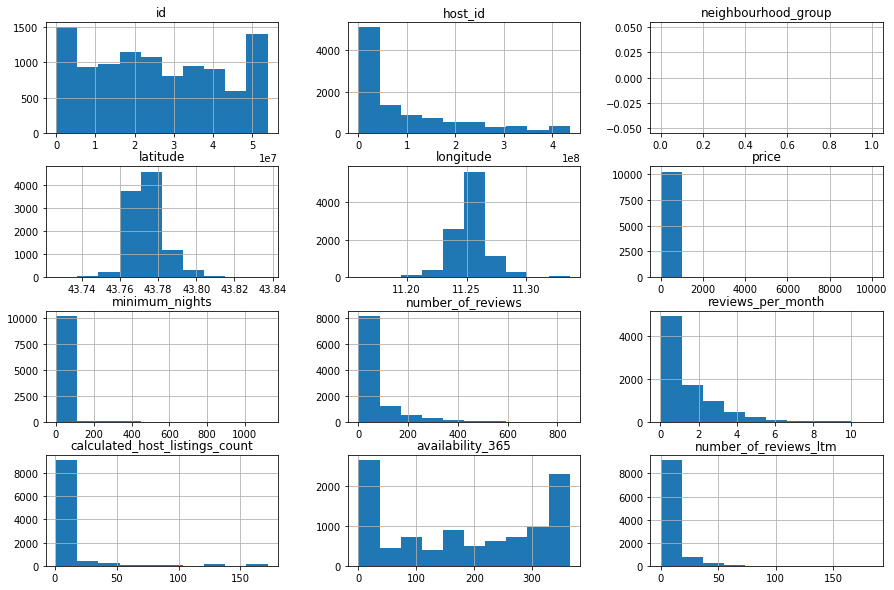

In [ ]:
#plotar histograma das variáveis numéricas
df.hist(bins = 10, figsize = (15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
#ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  ...  availability_365  number_of_reviews_ltm
count  10268.000000    10268.000000  ...      10268.000000           10268.000000
mean     123.433093        4.418972  ...        181.939521               5.790612
std      327.243201       27.853611  ...        136.612573              11.199432
min        0.000000        1.000000  ...          0.000000               0.000000
25%       55.000000        1.000000  ...         29.000000               0.000000
50%       79.500000        2.000000  ...        183.000000               0.000000
75%      119.000000        3.000000  ...        320.000000               6.000000
max     9999.000000     1120.000000  ...        365.000000             184.000000

[8 rows x 7 columns]

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 119, porém seu valor máximo é 9999.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

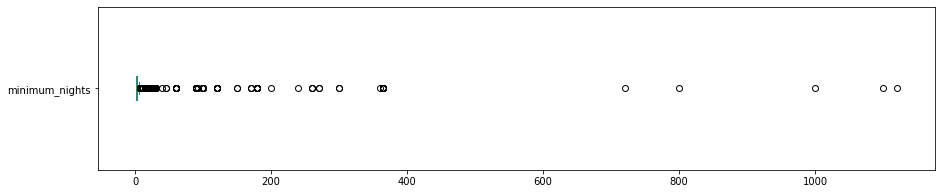

In [ ]:
#minimum_night
df.minimum_nights.plot(kind = 'box' , vert = False , figsize = (15,3))
plt.show()

In [ ]:
#ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30")
print("{} Entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30
97 Entradas
0.9447%


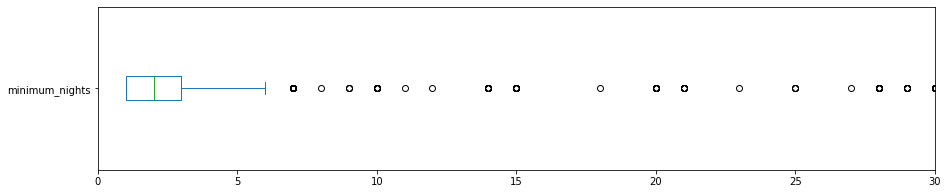

In [ ]:
# minimum_nights plot até 30
df.minimum_nights.plot(kind = 'box' , vert = False , xlim = (0 , 30) , figsize = (15,3));

#### Boxplot para price

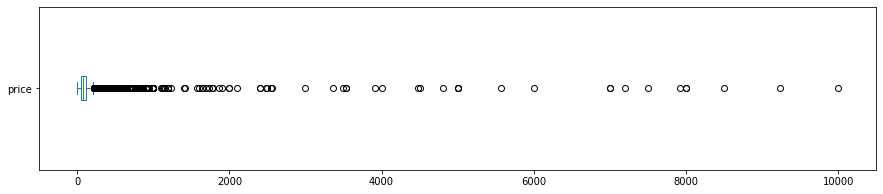

In [ ]:
#price
df.price.plot(kind = 'box', vert = False , figsize =(15,3))
plt.show()

In [ ]:
#ver a quantidade de valores 500 para price
print("\nprice : Valores acima de 500")
print("{} Entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))


price : Valores acima de 500
176 Entradas
1.7141%


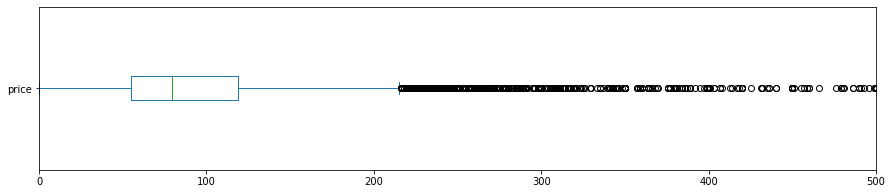

In [ ]:
# price plot até 500
df.price.plot(kind = 'box' , vert = False , xlim = (0 , 500) , figsize = (15,3));

#### Histogramas sem *outliers*

Com a identificação dos *outliers* nas variáveis `price` e `minimum_nights`, limparemos o *DataFrame* e plotar novamente o histograma.

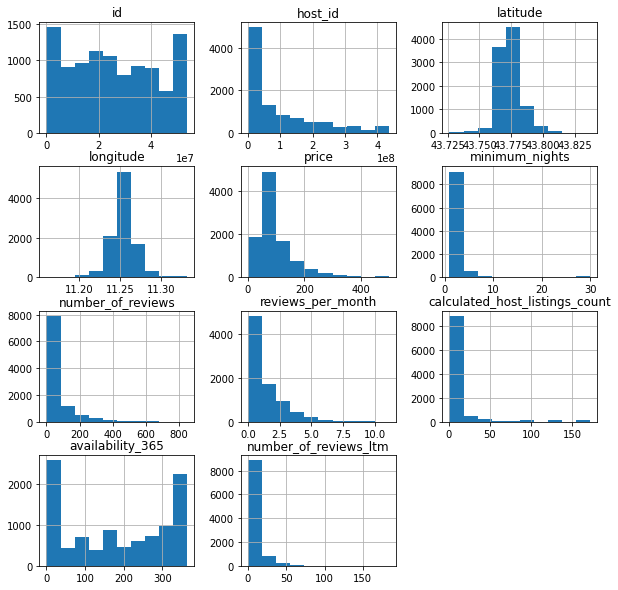

In [ ]:
#remover outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis = 0 , inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0 , inplace = True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group' , axis = 1, inplace = True)

#plotar o histograma para as variáveis numéricas:
df_clean.hist(bins = 10 , figsize = (10,10));


In [ ]:
#describe sem outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  ...  availability_365  number_of_reviews_ltm
count  9999.000000     9999.000000  ...       9999.000000            9999.000000
mean     97.525253        2.571257  ...        182.010101               5.920292
std      70.187057        3.706784  ...        136.474164              11.303818
min       0.000000        1.000000  ...          0.000000               0.000000
25%      55.000000        1.000000  ...         29.000000               0.000000
50%      79.000000        2.000000  ...        183.000000               0.000000
75%     115.000000        3.000000  ...        320.000000               7.000000
max     500.000000       30.000000  ...        365.000000             184.000000

[8 rows x 7 columns]

### **Q5. Qual a correlação existente entre as variáveis?**

A análise da correlação está contida dentro do campo de estudo da estatística. 

Sendo que a correlação analisa a relação entre duas variáveis, sendo um sinônimo de dependência.

O resultado obtido com o estudo da correlação pode ser basicamente de três tipos, sendo eles:
- **Positiva** : quando as variáveis se comportam de forma semelhante. Exemplo: quando uma aumenta, a outra também aumenta.
- **Negativa** : quando as variáveis se comportam de forma oposta. Exemplo: quando uma aumenta, a outra diminui.
- **Neutra** : o aumento ou redução de uma variável não impacta na outra variável em análise.

A relação entre as variáveis pode ser medida pelo coeficiente de correlação, este quantifica quão forte ou fraca é a correlação entre as variáveis do estudo.Sendo que correlações as fortes estão mais próximas dos números 1, para a correlação positiva e do número -1, para a correlação negativa. A correlação neutra se apresenta próximo ao número 0.

Neste case iremos:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação 
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

price  ...  availability_365
price                           1.000000  ...          0.055993
minimum_nights                 -0.027246  ...         -0.036704
number_of_reviews              -0.137219  ...          0.055252
reviews_per_month              -0.136592  ...          0.102655
calculated_host_listings_count  0.121977  ...          0.004012
availability_365                0.055993  ...          1.000000

[6 rows x 6 columns]

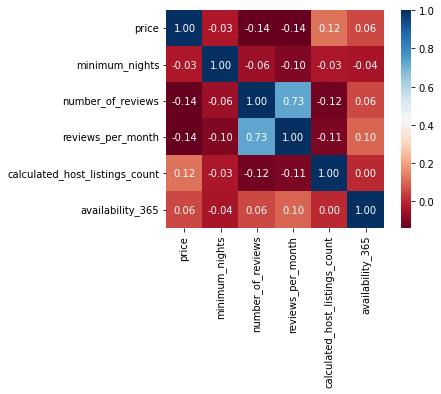

In [ ]:
sns.heatmap(corr, cmap = "RdBu" , fmt = '.2f' , square = True , linecolor = 'white' , annot = True);

É possível observar que as variáveis em matriz com ela mesma apresentam correlação perfeita positiva igual a 1.
As variáveis `reviews_per_month` quando combinadas com `number_of_reviews`, possuem correlação forte positiva, porém esperada pela característica de ambas variáveis.
As demais correlações são do tipo fraca ou neutra.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
#mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    7733
Private room       2125
Hotel room          181
Shared room          34
Name: room_type, dtype: int64

In [ ]:
#mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.767696
Private room       0.210960
Hotel room         0.017969
Shared room        0.003375
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara em Florença?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Centro Storico       109.276450
Gavinana Galluzzo    106.659631
Campo di Marte        80.221545
Isolotto Legnaia      69.651885
Rifredi               67.377312
Name: price, dtype: float64

Verificar se há quantidade não significativa de imóveis por localização que possa distorcer os dados de preço médio

In [ ]:
#mostrar a quantidade de imóvel disponível por localização
df_clean.neighbourhood.value_counts()

Centro Storico       7448
Campo di Marte        984
Rifredi               811
Isolotto Legnaia      451
Gavinana Galluzzo     379
Name: neighbourhood, dtype: int64

In [ ]:
#mostrar a percentual de imóvel disponível por localização
df_clean.neighbourhood.value_counts() / df_clean.shape[0]

Centro Storico       0.739274
Campo di Marte       0.097310
Rifredi              0.080908
Isolotto Legnaia     0.045105
Gavinana Galluzzo    0.037404
Name: neighbourhood, dtype: float64

Com as variáveis Latitude e Longitude dos imóveis, podemos plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

## **Principais Regiões**

Com as informações de *latitude*, *longitude* e o *nome do bairro*, podemos assim montar um **mapa com as principais regiões** de *Florença* (onde se tem mais imóveis anunciados no *Airbnb*).

A biblioteca *Folium* nos permite observar a quantidade dos imóveis por um grupo de ruas, estando presente o conjunto que as compõe, apenas passando o mouse sobre o mapa.

In [ ]:
mapa = folium.Map(location=[ 43.7687	, 11.2569 ], zoom_start= 13)
coordenadas= []
for lat, lng in zip(df_clean.latitude, df_clean.longitude):
    coordenadas.append([lat,lng])
    
mapa.add_child(plugins.MarkerCluster(coordenadas))
mapa

A biblioteca *Matplotlib* disponibiliza recurso que é possível visualizar a distribuição dos imóveis, por meio das coordenadas de latitude e longitude. 

No exemplo abaixo, destaquei o preço para apontar a localização de cada imóvel.

Acomodações mais acessíveis estão no plot na cor azul escuro, passando por toda a escala de cor até alcançar os imóveis de custo mais elevado na cor vermelha.

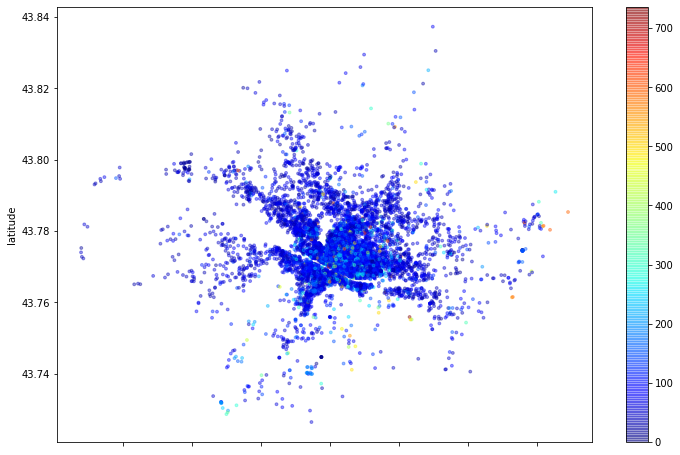

In [ ]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize =(12,8));

#### Conclusões
